
# AutoML approach

This notebook illustrates the usage of  pycaret (https://www.pycaret.org/tutorials/html/ANO101.html) to perform anomaly detection.

In [11]:
import sys
sys.path.append('../src')
import evaluation_utils, data_utils
import json
from pycaret.anomaly import *

X shape: (1831, 21), y shape: (1831,)


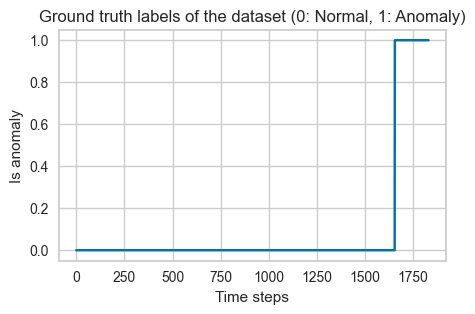

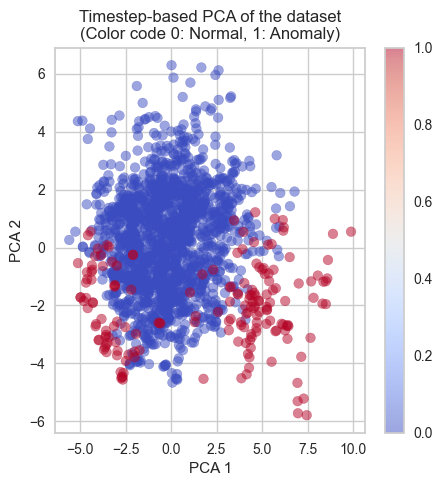

In [12]:
# Load input data
X, y = data_utils.get_data('../data/6_cardio.npz')
data_utils.plot_dataset(X, y)

In [13]:
# Setup the anomaly detection model
s = setup(X, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(1831, 21)"
2,Transformed data shape,"(1831, 21)"
3,Numeric features,21
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [14]:
# Print all available models
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pycaret.internal.patches.pyod.CBLOFForceToDouble
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [15]:
model = create_model('cof', fraction = 0.1)
results = assign_model(model)
results.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,Anomaly,Anomaly_Score
0,0.004912,0.693191,-0.203640,0.595322,0.353190,-0.061401,-0.278295,-1.650444,0.759072,-0.420487,...,1.854728,0.622631,0.963083,0.301464,0.193113,0.231498,-0.289786,-0.493294,0,1.161381
1,0.110729,-0.079903,-0.203640,1.268942,0.396246,-0.061401,-0.278295,-1.710270,0.759072,-0.420487,...,1.854728,0.278625,0.963083,0.301464,0.129265,0.093563,-0.256385,-0.493294,0,1.103621
2,0.216546,-0.272445,-0.203640,1.050988,0.148753,-0.061401,-0.278295,-1.710270,1.106509,-0.420487,...,0.314689,2.342663,-0.488279,0.061002,0.065417,0.024596,-0.256385,1.140018,0,1.117831
3,0.004912,0.727346,-0.203640,1.212171,-0.683598,-0.061401,-0.278295,-1.710270,1.106509,-0.420487,...,0.314689,1.654650,-0.488279,0.061002,0.193113,0.093563,-0.323186,1.140018,0,1.283857
4,-0.100905,0.363595,1.321366,1.027120,0.141359,-0.061401,-0.278295,-0.992364,-0.051613,-0.420487,...,-0.565334,0.278625,-0.488279,-0.059229,0.065417,0.024596,-0.456787,1.140018,0,1.159927


In [16]:
predicted_anomalies = results['Anomaly']

In [17]:
# Perform evaluation
scores = evaluation_utils.run_evaluation(y, predicted_anomalies, do_point_adjustment=True)

In [18]:
# Pretty print results
print(json.dumps(scores, indent=4))

{
    "AUCROC": 0.5641478989288656,
    "AUCPR": 0.12020223272920445,
    "F1": 0.21169416636438185,
    "Precision": 0.20765027322404372,
    "Recall": 0.2159090909090909,
    "Adjusted AUCROC": 0.9561933534743202,
    "Adjusted AUCPR": 0.5482866043613707,
    "Adjusted F1": 0.708244922603216,
    "Adjusted Precision": 0.5482866043613707,
    "Adjusted Recall": 1.0
}


In [19]:
# results are saved in a .npz file
data_utils.save_results(f"results/pycaret Connectivity-Based Local Outlier.npz", scores)

Results saved to results/pycaret Connectivity-Based Local Outlier.npz
